In [1]:
%pylab inline
from glob import glob
from numpy import load
import pandas as pd


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import yaml
Yaml=yaml.safe_load(open('../config.yaml','r'))
path=Yaml['data_path']
band_names=['Red','Green','Blue','NIR','SWIR1','SWIR2','TEMP1','NL']
path

'/Users/yoavfreund/datasets/poverty_v1.1/anon_images/'

In [3]:
files=glob(f'{path}*.npz')
len(files)

19669

In [4]:
#load table entries
train_table='../public_tables/train.csv'
!ls -l $train_table

df=pd.read_csv(train_table,index_col=0)
df.index=df['filename']
df.head(3)

-rw-r--r--  1 yoavfreund  staff  754736 May 15 12:50 ../public_tables/train.csv


,filename,country,wealthpooled,urban,label,nl_mean
filename,,,,,,
image7716.npz,image7716.npz,21,-1.090052,False,0,-0.097684
image603.npz,image603.npz,21,1.454064,True,1,11.082343
image1199.npz,image1199.npz,21,1.708446,True,1,12.646744


### Display some images 
For each image we have a larger RBG, a smaller image for each channel, and the histogram for each channel

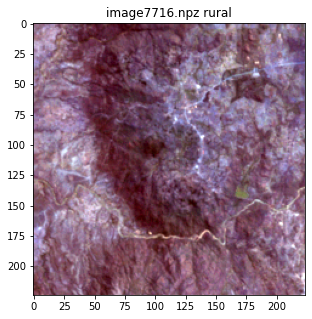

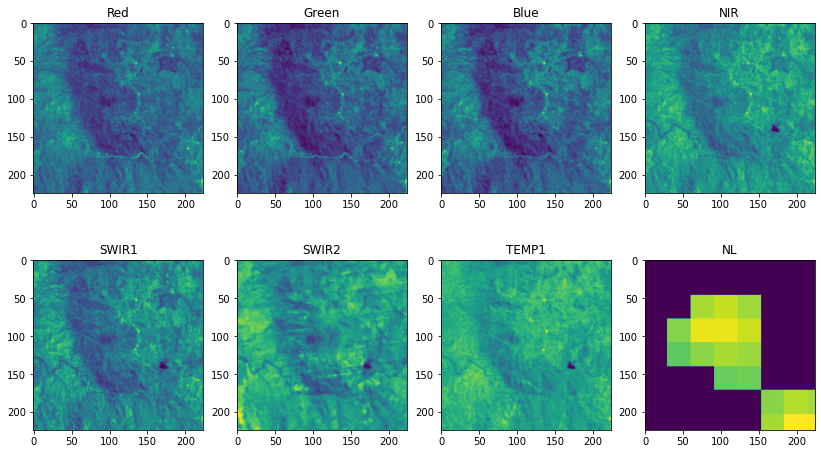

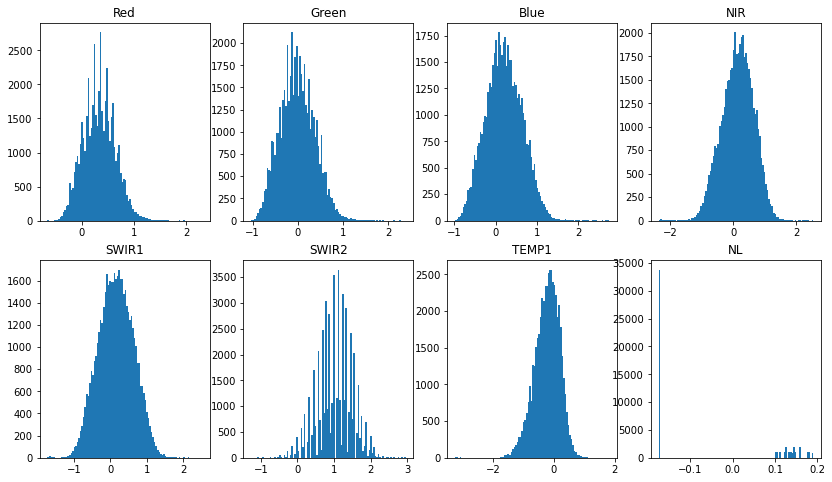

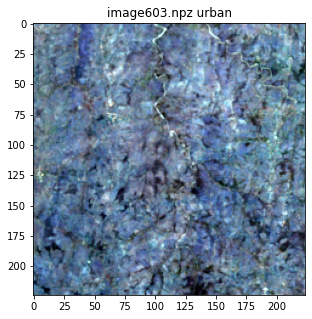

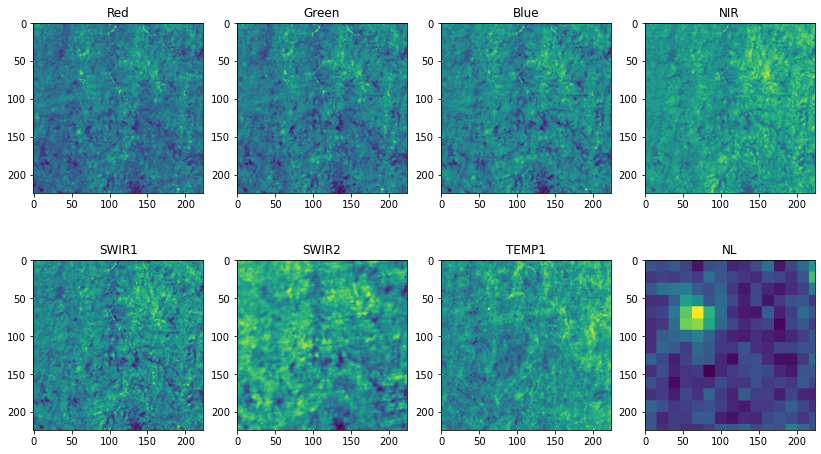

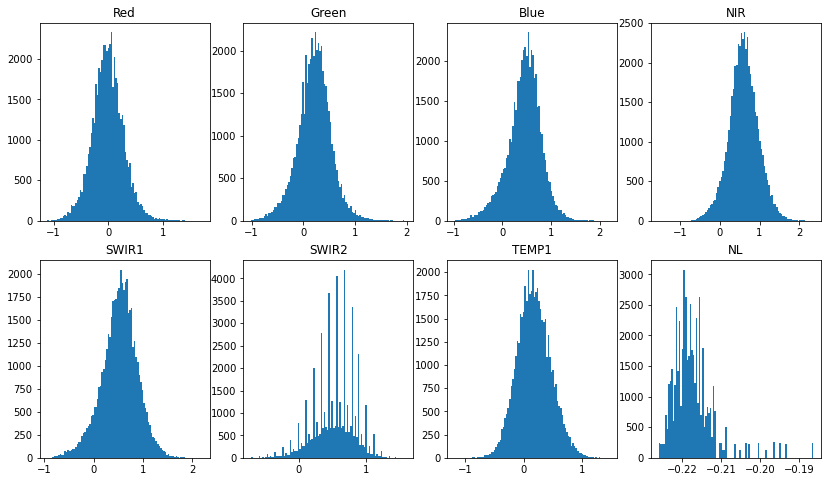

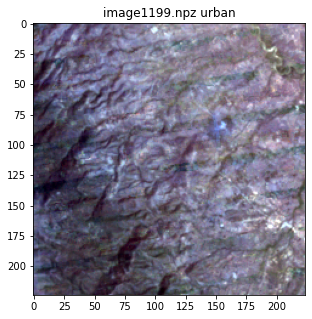

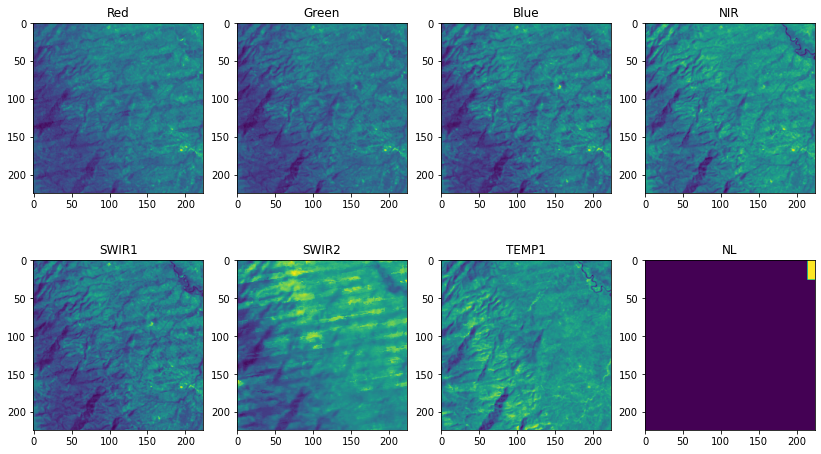

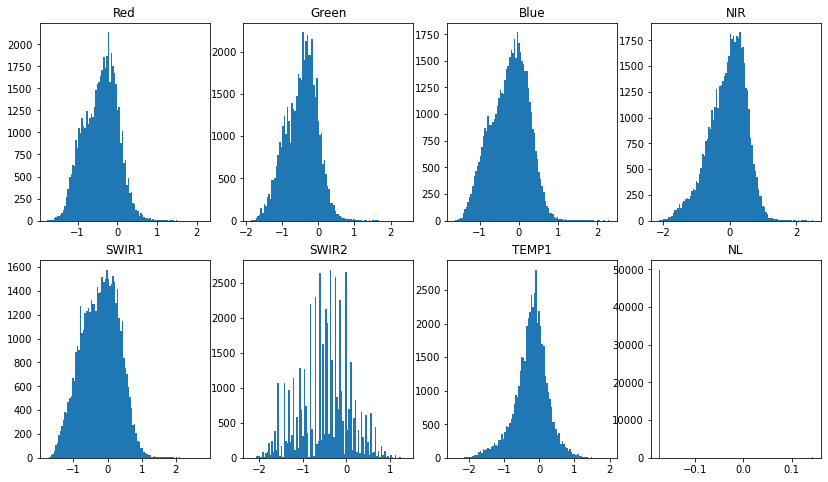

In [5]:
for n in range(3):

    row=df.iloc[n,:]
    filename=row['filename']
    urban=row['urban']
    area ='urban' if urban else 'rural'
    try:
        M=load(path+filename)
    except:
        print (f'could not load image:{n}, path:'+path+filename)
        continue
    Image=M['x']
    #noise=np.random.normal(0, 0.01, Image.shape)
    #Image+=noise
    # generate RGB image (scaled)
    S=Image[:3,:,:].flatten()
    _min=percentile(S,0.1)
    _max=percentile(S,99.9)
    # print('Image',_min,_max)

    R=zeros([224,224,3])
    for i in range(3):
        R[:,:,i]=(Image[i,:,:]-_min)/(_max-_min)
    #print('R',min(R.flatten()),max(R.flatten()))
    R[R>1]=1
    R[R<0]=0

    figure(figsize=[5,5])
    imshow(R)
    title(filename+' '+area)
    figure(figsize=[14,8])
    i=1
    for j in range(8):
        subplot(2,4,i)
        i+=1
        imshow(Image[j,:,:])
        title(band_names[j])

    figure(figsize=[14,8])
    i=1
    for j in range(8):
        subplot(2,4,i)
        i+=1
        hist(Image[j,:,:].flatten(),bins=100)
        title(band_names[j])